<a href="https://colab.research.google.com/github/Kriskan17/Berkeley_AIML/blob/main/prompt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [3]:
data = pd.read_csv('/content/drive/My Drive/aiml/assignment_5_1_starter/data/coupons.csv')

In [4]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [ ]:
data.sample(25)

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
7887,No Urgent Place,Friend(s),Sunny,80,2PM,Restaurant(20-50),2h,Male,26,Married partner,...,gt8,4~8,4~8,less1,1,1,0,0,1,0
2640,Home,Alone,Sunny,80,6PM,Coffee House,2h,Male,46,Married partner,...,never,4~8,4~8,1~3,1,0,0,0,1,0
5010,No Urgent Place,Partner,Sunny,80,10AM,Coffee House,1d,Female,31,Married partner,...,never,1~3,gt8,1~3,1,0,0,0,1,0
9192,Home,Alone,Sunny,30,6PM,Restaurant(20-50),1d,Male,21,Single,...,never,less1,less1,less1,1,0,0,1,0,1
4546,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,31,Married partner,...,1~3,4~8,1~3,less1,1,1,0,0,1,1
8663,Home,Alone,Snowy,30,6PM,Coffee House,1d,Male,41,Single,...,never,1~3,1~3,never,1,1,0,0,1,1
1380,No Urgent Place,Partner,Sunny,80,6PM,Restaurant(<20),2h,Male,41,Married partner,...,less1,1~3,1~3,less1,1,0,0,0,1,1
11799,Work,Alone,Snowy,30,7AM,Bar,1d,Female,41,Married partner,...,less1,less1,less1,less1,1,1,1,0,1,1
1000,No Urgent Place,Kid(s),Sunny,80,2PM,Restaurant(<20),1d,Female,31,Married partner,...,never,1~3,never,never,1,0,0,0,1,1
7783,No Urgent Place,Friend(s),Snowy,30,10PM,Carry out & Take away,1d,Male,26,Single,...,gt8,gt8,gt8,gt8,1,1,0,0,1,1


In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

3. Decide what to do about your missing data -- drop, replace, other...

Remove 'car' column as it is missing most of the data (108/12684) and rename mislabeled column 'Passanger'.


In [18]:
data = data.drop(columns=['car'])
data = data.rename(columns={'passanger':'passenger'})
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passenger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  Bar                   12577 non-null  object
 15  CoffeeHouse           12467 non-null

Review the data loss when the dropping Null data.



In [19]:
datawithoutnans = data.dropna()
datawithoutnans.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12079 entries, 22 to 12683
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12079 non-null  object
 1   passenger             12079 non-null  object
 2   weather               12079 non-null  object
 3   temperature           12079 non-null  int64 
 4   time                  12079 non-null  object
 5   coupon                12079 non-null  object
 6   expiration            12079 non-null  object
 7   gender                12079 non-null  object
 8   age                   12079 non-null  object
 9   maritalStatus         12079 non-null  object
 10  has_children          12079 non-null  int64 
 11  education             12079 non-null  object
 12  occupation            12079 non-null  object
 13  income                12079 non-null  object
 14  Bar                   12079 non-null  object
 15  CoffeeHouse           12079 non-nul

In [20]:
percent_data_retained = round(len(datawithoutnans)/len(data) * 100, 2)
print(f'Percentage of data retained if drop nulls: {percent_data_retained}%')
percent_accepted_withnull = round(len(data[data['Y'] == 1])/len(data) * 100, 2)
percent_accepted_withoutnull = round(len(datawithoutnans[datawithoutnans['Y'] == 1])/len(datawithoutnans) * 100, 2)
print(f'Percent of coupons accepted with nulls: {percent_accepted_withnull}% and without: {percent_accepted_withoutnull}%')

Percentage of data retained if drop nulls: 95.23%
Percent of coupons accepted with nulls: 56.84% and without: 56.93%


drop data as we keep most of the data.

In [21]:
data=datawithoutnans

Drop data as we keep most of the data and there is minimal impact after dropping nans.


4. What proportion of the total observations chose to accept the coupon?



In [22]:
percent_accepted = round(len(data[data['Y'] == 1])/len(data) * 100, 2)
print(percent_accepted)

56.93


5. Use a bar plot to visualize the `coupon` column.

Text(0.5, 0, 'Coupon Accepted ratio')

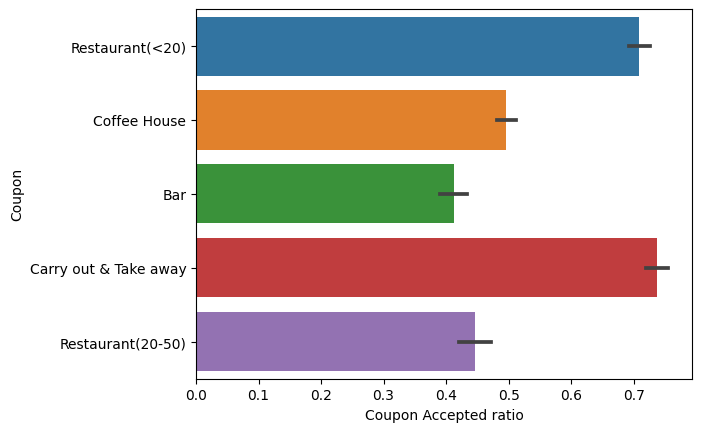

In [23]:
sns.barplot(data,x='Y',y='coupon', linewidth=5)
plt.ylabel('Coupon')
plt.xlabel('Coupon Accepted ratio')


6. Use a histogram to visualize the temperature column.

<Axes: xlabel='temperature', ylabel='Count'>

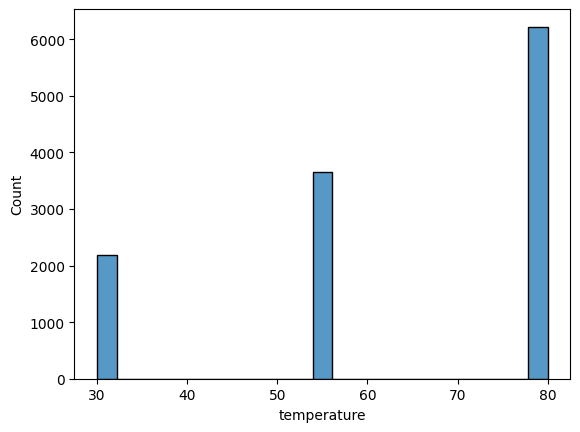

In [24]:
sns.histplot(data['temperature'])

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [25]:
bardata=data.query('coupon=="Bar"')
bardata.info()
bardata.sample(5)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1913 entries, 24 to 12682
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           1913 non-null   object
 1   passenger             1913 non-null   object
 2   weather               1913 non-null   object
 3   temperature           1913 non-null   int64 
 4   time                  1913 non-null   object
 5   coupon                1913 non-null   object
 6   expiration            1913 non-null   object
 7   gender                1913 non-null   object
 8   age                   1913 non-null   object
 9   maritalStatus         1913 non-null   object
 10  has_children          1913 non-null   int64 
 11  education             1913 non-null   object
 12  occupation            1913 non-null   object
 13  income                1913 non-null   object
 14  Bar                   1913 non-null   object
 15  CoffeeHouse           1913 non-null 

,destination,passenger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
10234,No Urgent Place,Partner,Sunny,55,2PM,Bar,1d,Female,below21,Unmarried partner,...,4~8,1~3,4~8,less1,1,0,0,0,1,0
3615,Home,Alone,Sunny,55,6PM,Bar,1d,Female,26,Single,...,less1,less1,1~3,less1,1,0,0,1,0,0
12281,Work,Alone,Snowy,30,7AM,Bar,1d,Male,26,Single,...,gt8,4~8,4~8,4~8,1,1,1,0,1,1
2642,Work,Alone,Sunny,55,7AM,Bar,1d,Male,46,Married partner,...,never,4~8,4~8,1~3,1,1,1,0,1,1
620,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Female,21,Married partner,...,gt8,1~3,gt8,1~3,1,1,0,0,1,0


2. What proportion of bar coupons were accepted?


0    0.588082
1    0.411918
Name: Y, dtype: float64


([<matplotlib.patches.Wedge at 0x7e04daede800>,
 [Text(-0.3005181969099477, 1.0581534923280242, 'Didnt accept Coupon'),
  Text(0.3005181969099478, -1.0581534923280242, 'Accepted Coupon')],
 [Text(-0.16391901649633508, 0.5771746321789223, '58.8%'),
  Text(0.16391901649633514, -0.5771746321789223, '41.2%')])

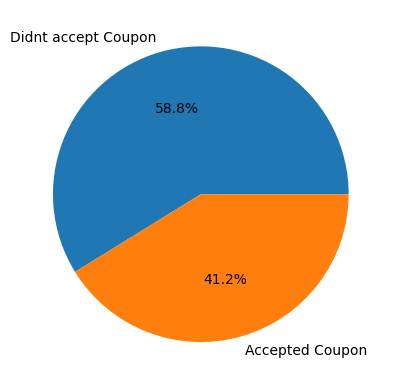

In [160]:


print(bardata['Y'].value_counts(normalize=True))
plt.pie(bardata['Y'].value_counts(normalize=True),labels=("Didnt accept Coupon", "Accepted Coupon"), autopct="%1.1f%%")


Proportion of coupons accepted is 0.411918

3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [27]:
bardata['Bar'].value_counts()

never    788
less1    553
1~3      379
4~8      147
gt8       46
Name: Bar, dtype: int64

In [52]:
bar3orless=bardata.query('Bar in ["never","less1","1~3"]')
len(bar3orless)
barmore3=bardata.query('Bar in ["4~8", "gt8"]')
len(barmore3)

bar3orless_coupon=len(bar3orless.query('Y==1'))
barmore3_coupon=len(barmore3.query('Y==1'))

print('coupon acceptance rate for more than 3:',(bar3orless_coupon/len(bar3orless)))

print('coupon acceptance rate for more than 3:',(barmore3_coupon/len(barmore3)))




coupon acceptance rate for more than 3: 0.37267441860465117
coupon acceptance rate for more than 3: 0.7616580310880829


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [74]:
# Fix age column

age=bardata['age'].copy()
age=pd.to_numeric(age.str.replace('below21', '20', regex=False).str.replace('50plus', '50', regex=False))
bardata.insert(bardata.shape[1], 'age_int', age)





In [86]:
bardata1=bardata.query('age_int > 25 and Bar in ["1~3", "4~8", "gt8"]')
print(len(bardata1))  # Age > 25 and more than once
bardata2=bardata.query('Bar in ["never", "less1"]')
print(len(bardata2))  # Less than once a month
print(len(bardata1.query('Y==1')))
print(len(bardata2.query('Y==1')))
print('Coupon acceptance rate for more than once a month :', (len(bardata1.query('Y==1'))/len(bardata1)))
print('Coupon acceptance rate for Less than once a month :', (len(bardata2.query('Y==1'))/len(bardata2)))

403
1341
278
396
Coupon acceptance rate for more than once a month : 0.6898263027295285
Coupon acceptance rate for Less than once a month : 0.2953020134228188


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


In [96]:
bardata5= bardata.query('Bar in ["1~3", "4~8", "gt8"] and passenger in ["Friends(s)", "Partner"] and occupation != "Farming Fishing & Forestry"')
print(len(bardata5))
bardata5_coupon= bardata5.query('Y==1')
print(len(bardata5_coupon))

print ('Coupon accepted by ' , (len(bardata5_coupon)/len(bardata5)))

73
44
Coupon accepted by  0.6027397260273972


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



In [104]:
bardata6=bardata.query('Bar in ["1~3", "4~8", "gt8"] and passenger in ["Friends(s)", "Partner"] and maritalStatus != "Widowed"')
bardata6a= bardata.query('Bar in ["1~3", "4~8", "gt8"] and age_int < 30')
bardata6b= bardata.query('RestaurantLessThan20 in ["4~8", "gt8"] and income in ["Less than $12500", "$12500 - $24999", "$25000 - $37499", "$37500 - $49999"]')
bardata6_coupon=bardata6.query('Y==1')
bardata6a_coupon=bardata6a.query('Y==1')
bardata6b_coupon=bardata6b.query('Y==1')

print ('Coupon accepted by criteria 1' , (len(bardata6_coupon)/len(bardata6)))
print ('Coupon accepted by criteria 2' , (len(bardata6a_coupon)/len(bardata6a)))
print ('Coupon accepted by criteria 3' , (len(bardata6b_coupon)/len(bardata6b)))


Coupon accepted by criteria 1 0.6027397260273972
Coupon accepted by criteria 2 0.7195121951219512
Coupon accepted by criteria 3 0.45645645645645644


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

Drivers who accept coupons are the frequent customers to the Bars and are morel likely to be older than 25.

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

Im using the cafe data provided in the file for this part of the investigation.

Create a new DataFrame that contains just the cafe coupons.

In [109]:
cafedata=data.query('coupon=="Coffee House"')
cafedata.info()
cafedata.sample(5)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3816 entries, 23 to 12681
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           3816 non-null   object
 1   passenger             3816 non-null   object
 2   weather               3816 non-null   object
 3   temperature           3816 non-null   int64 
 4   time                  3816 non-null   object
 5   coupon                3816 non-null   object
 6   expiration            3816 non-null   object
 7   gender                3816 non-null   object
 8   age                   3816 non-null   object
 9   maritalStatus         3816 non-null   object
 10  has_children          3816 non-null   int64 
 11  education             3816 non-null   object
 12  occupation            3816 non-null   object
 13  income                3816 non-null   object
 14  Bar                   3816 non-null   object
 15  CoffeeHouse           3816 non-null 

,destination,passenger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
1302,Work,Alone,Sunny,55,7AM,Coffee House,2h,Male,50plus,Unmarried partner,...,4~8,4~8,1~3,less1,1,1,0,0,1,0
3325,Home,Alone,Sunny,80,6PM,Coffee House,2h,Male,36,Married partner,...,4~8,1~3,1~3,less1,1,0,0,0,1,1
4188,Work,Alone,Sunny,80,7AM,Coffee House,2h,Male,26,Single,...,never,1~3,less1,less1,1,0,0,1,0,0
2041,No Urgent Place,Kid(s),Sunny,55,6PM,Coffee House,2h,Female,26,Married partner,...,1~3,1~3,4~8,1~3,1,1,0,0,1,0
1395,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,50plus,Widowed,...,less1,1~3,4~8,less1,1,0,0,0,1,1


**2. What proportion of bar coupons were accepted?**

0    0.503669
1    0.496331
Name: Y, dtype: float64


([<matplotlib.patches.Wedge at 0x7e04da3fdc90>,
 [Text(-0.012678130424871693, 1.099926936213915, 'Didnt accept Coupon'),
  Text(0.012678233407463494, -1.099926935026898, 'Accepted Coupon')])

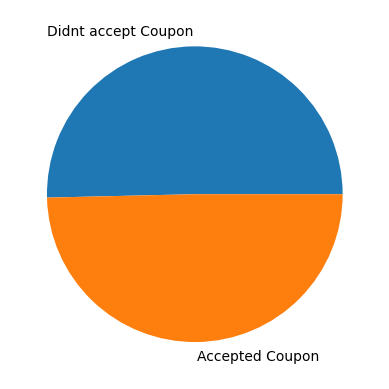

In [110]:
print(cafedata['Y'].value_counts(normalize=True))
plt.pie(cafedata['Y'].value_counts(normalize=True),labels=("Didnt accept Coupon", "Accepted Coupon"))

## **3. Compare the acceptance rate between those who went to a cafe 3 or fewer times a month to those who went more.**

In [113]:
cafedata['CoffeeHouse'].value_counts()


less1    1052
1~3      1019
never     896
4~8       507
gt8       342
Name: CoffeeHouse, dtype: int64

coupon acceptance rate for less than 3: 0.44590495449949447
coupon acceptance rate for more than 3: 0.6725559481743227


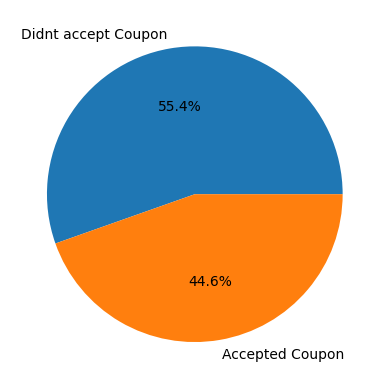

In [146]:
cafe3orless=cafedata.query('CoffeeHouse in ["never","less1","1~3"]')
len(cafe3orless)
cafemore3=cafedata.query('CoffeeHouse in ["4~8", "gt8"]')
len(cafemore3)

cafe3orless_coupon=len(cafe3orless.query('Y==1'))
cafemore3_coupon=len(cafemore3.query('Y==1'))

print('coupon acceptance rate for less than 3:',(cafe3orless_coupon/len(cafe3orless)))

print('coupon acceptance rate for more than 3:',(cafemore3_coupon/len(cafemore3)))
fig1=plt.pie(cafe3orless['Y'].value_counts(normalize=True),labels=("Didnt accept Coupon", "Accepted Coupon"), autopct="%1.1f%%")



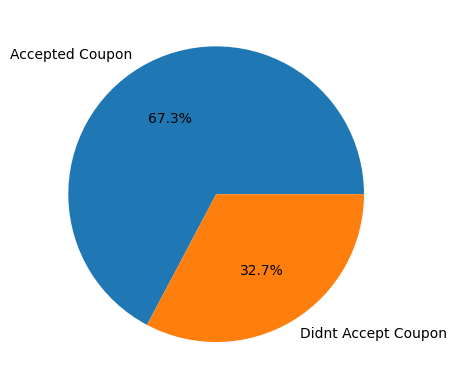

In [149]:
fig2=plt.pie(cafemore3['Y'].value_counts(normalize=True),labels=("Accepted Coupon", "Didnt Accept Coupon"), autopct="%1.1f%%")


**4. Compare the acceptance rate between drivers who go to a cafe more than once a month and are over the age of 25 to the all others. Is there a difference?**

In [133]:
age3=cafedata['age'].copy()
age3=pd.to_numeric(age3.str.replace('below21', '20', regex=False).str.replace('50plus', '50', regex=False))

#cafedata.drop(columns=['age_int','age_int2','age_int3'])
#cafedata.insert(cafedata.shape[1], 'age_int', age3)


cafedata.sample(10)

,destination,passenger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y,age_int,age_int2,age_int3
3491,Work,Alone,Sunny,55,7AM,Coffee House,2h,Female,41,Married partner,...,less1,1,1,0,0,1,0,NaN,NaN,41
3537,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Single,...,1~3,1,0,0,0,1,1,NaN,NaN,21
7374,No Urgent Place,Friend(s),Sunny,80,6PM,Coffee House,1d,Male,below21,Unmarried partner,...,less1,1,0,0,0,1,0,NaN,NaN,20
8027,Home,Alone,Rainy,55,10PM,Coffee House,1d,Male,21,Single,...,less1,1,0,0,1,0,1,NaN,NaN,21
861,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,26,Unmarried partner,...,less1,1,1,0,0,1,0,NaN,NaN,26
6384,Work,Alone,Sunny,55,7AM,Coffee House,1d,Female,26,Unmarried partner,...,gt8,1,1,0,0,1,0,NaN,NaN,26
1002,No Urgent Place,Kid(s),Sunny,55,6PM,Coffee House,2h,Female,31,Married partner,...,never,1,1,0,0,1,0,NaN,NaN,31
1216,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Male,below21,Single,...,1~3,1,0,0,0,1,1,NaN,NaN,20
5576,Home,Alone,Sunny,80,6PM,Coffee House,1d,Male,36,Married partner,...,less1,1,0,0,1,0,0,NaN,NaN,36
9726,Work,Alone,Sunny,80,7AM,Coffee House,1d,Female,46,Single,...,1~3,1,0,0,1,0,1,NaN,NaN,46


1340
1948
857
663
Coupon acceptance rate for more than once a month : 0.6395522388059701
Coupon acceptance rate for Less than once a month : 0.34034907597535935


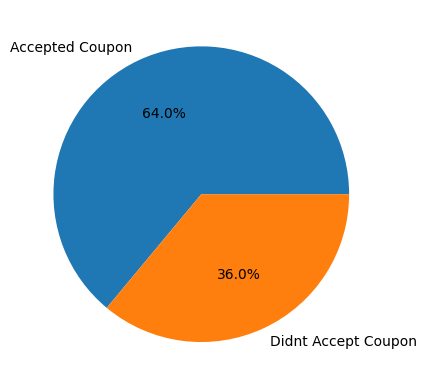

In [152]:
cafedata1=cafedata.query('age_int3 > 25 and CoffeeHouse in ["1~3", "4~8", "gt8"]')
print(len(cafedata1))  # Age > 25 and more than once
cafedata2=cafedata.query('CoffeeHouse in ["never", "less1"]')
print(len(cafedata2))  # Less than once a month
print(len(cafedata1.query('Y==1')))
print(len(cafedata2.query('Y==1')))
print('Coupon acceptance rate for more than once a month :', (len(cafedata1.query('Y==1'))/len(cafedata1)))
print('Coupon acceptance rate for Less than once a month :', (len(cafedata2.query('Y==1'))/len(cafedata2)))

fig3=plt.pie(cafedata1['Y'].value_counts(),labels=("Accepted Coupon", "Didnt Accept Coupon"), autopct="%1.1f%%")

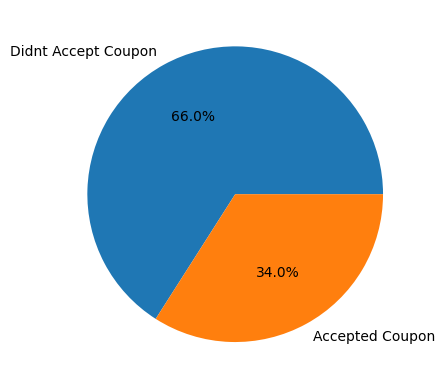

In [154]:
fig4=plt.pie(cafedata2['Y'].value_counts(),labels=( "Didnt Accept Coupon", "Accepted Coupon",), autopct="%1.1f%%")

**5. Use the same process to compare the acceptance rate between drivers who go to cafes more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.**

118
92
Coupon accepted by  0.7796610169491526


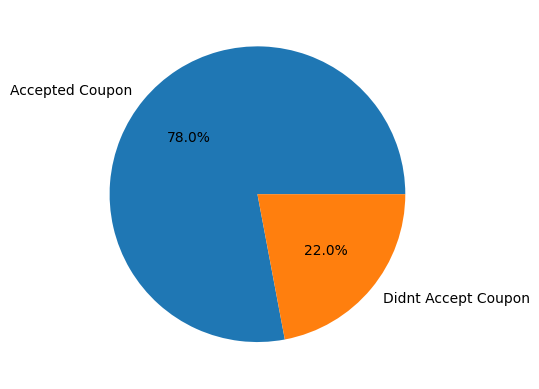

In [155]:
cafedata5= cafedata.query('CoffeeHouse in ["1~3", "4~8", "gt8"] and passenger in ["Friends(s)", "Partner"] and occupation != "Farming Fishing & Forestry"')
print(len(cafedata5))
cafedata5_coupon= cafedata5.query('Y==1')
print(len(cafedata5_coupon))

print ('Coupon accepted by ' , (len(cafedata5_coupon)/len(cafedata5)))
fig5=plt.pie(cafedata5['Y'].value_counts(),labels=("Accepted Coupon", "Didnt Accept Coupon"), autopct="%1.1f%%")

6. Compare the acceptance rates between those drivers who:
go to cafes more than once a month, had passengers that were not a kid, and
were not widowed OR
go to cheap restaurants more than 4 times a month and income is less than 50K. **bold text**

Coupon accepted by criteria 1 0.7796610169491526
Coupon accepted by criteria 3 0.5469845722300141


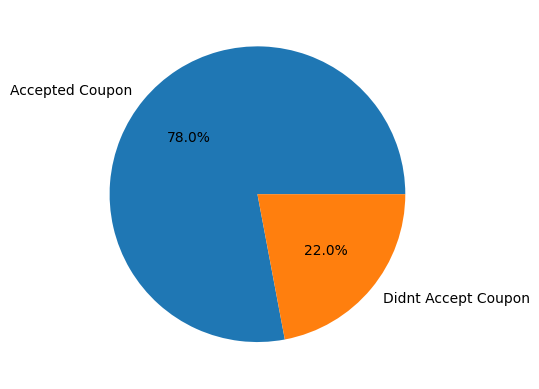

In [156]:
cafedata6=cafedata.query('CoffeeHouse in ["1~3", "4~8", "gt8"] and passenger in ["Friends(s)", "Partner"] and maritalStatus != "Widowed"')
cafedata6a= cafedata.query('CoffeeHouse in ["1~3", "4~8", "gt8"] and age_int < 30')
cafedata6b= cafedata.query('RestaurantLessThan20 in ["4~8", "gt8"] and income in ["Less than $12500", "$12500 - $24999", "$25000 - $37499", "$37500 - $49999"]')
cafedata6_coupon=cafedata6.query('Y==1')
cafedata6a_coupon=cafedata6a.query('Y==1')
cafedata6b_coupon=cafedata6b.query('Y==1')

print ('Coupon accepted by criteria 1' , (len(cafedata6_coupon)/len(cafedata6)))
#print ('Coupon accepted by criteria 2' , (len(cafedata6a_coupon)/len(cafedata6a))) (no data for this group)
print ('Coupon accepted by criteria 3' , (len(cafedata6b_coupon)/len(cafedata6b)))

fig6=plt.pie(cafedata6['Y'].value_counts(),labels=("Accepted Coupon", "Didnt Accept Coupon"), autopct="%1.1f%%")

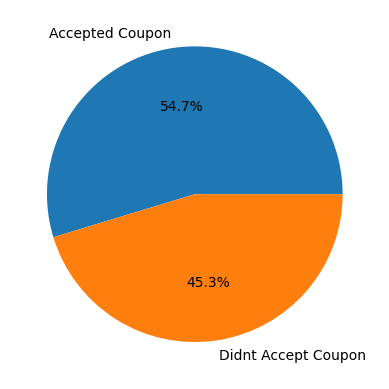

In [159]:
fig6b=plt.pie(cafedata6b['Y'].value_counts(),labels=("Accepted Coupon", "Didnt Accept Coupon"), autopct="%1.1f%%")

&. Based on these observations, what do you hypothesize about drivers who accepted the Cafe coupons?

 Coupons are accepted at higher rate by

 1. Customers who visit the cafe more
 2. Customers who visit the cafes with a companion that is not kids
 The other factors did not have significant effect on coupon accpetance rate like age or income .